In [68]:
import numpy as np  # Fast math and arrays
import matplotlib.pyplot as plt  # Displays
import matplotlib.colors as colors  # colors
import matplotlib.cm as cmx  # Colormaps

%matplotlib inline  

# Solutions

This is the original perceptron network. 

### The variables 

In [52]:
target_num = 7

### The code

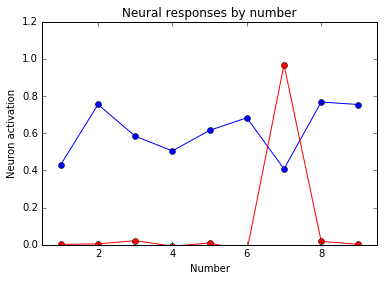

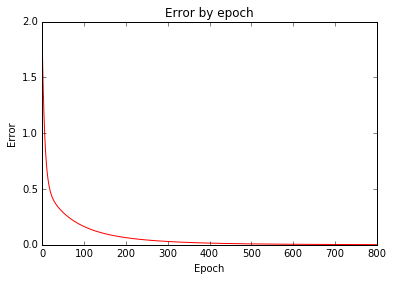

In [85]:
num = np.loadtxt("7.txt")  # Load the corresponding file , 1...9.txt
vals = np.arange(1, 10)

x = np.zeros((num.size))                # Input values
w = np.random.random((num.size)) / 10   # Synapses
eta = 0.01  # Learning rate


def set_inputs(digit):
    """Loads the inputs corresponding to a digit into the input values"""
    global x
    if digit >= 1 and digit < 10:
        x = np.loadtxt("%s.txt" % digit).flatten()
        
def activation():
    """Linear activation rule"""
    inputs = w * x
    return sum(inputs)

def calculate_response(digit):
    """Calculates the response of the neuron to a digit"""
    set_inputs(digit)
    return activation()


def target(i):
    """Desired response function, t(p)"""
    if i == target_num:
        return 1.0
    else:
        return 0.0
    
def error(i, response):
    """Calculates the error function"""
    return 0.5 * ((target(i) - response) ** 2)
    
def gradient_descent(n = 1):
    """Performs the gradient descent algorithm over N epochs"""
    global w
    for i in np.arange(n):
        dw = np.zeros(w.shape)  # General dW = 0.
        e = 0.0 
        for j in vals:  # For every number in our set
            y = calculate_response(j)
            e += error(j, y)  # Calculate the error
            #dwj = x * (target(j) - y)
            dwj = x.reshape(28, 1).dot(target(j) -y)
            dwj = dwj / len(vals)   # Increments dW with this number's results
            dw += dwj.reshape(dw.shape)
        
        E.append(e)
        w += eta * dw  # updates W

target_num = 7
E = []  # Error by epoch

w = np.random.random(num.size)/10   # Synapses

ys_start = [calculate_response(j) for j in vals]

plt.axis([0.5, 9.5, 0, 1.2])
plt.plot(vals, ys_start, "bo-")

gradient_descent(n = 800)

ys_end = [calculate_response(j) for j in vals]
plt.plot(vals, ys_end, "ro-")
plt.title("Neural responses by number")
plt.xlabel("Number")
plt.ylabel("Neuron activation")
plt.show()

plt.plot(E, "r-")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error by epoch")
plt.show()

### New solution

In this solution, we simply modify the target response function $t(n)$, so that the desired response to a number $n$ is simply a a decimal number $n/10$:

In [86]:
def target(i):
    """New desired response function"""
    return i/10.0

With this solution in place, we can run the same simulations

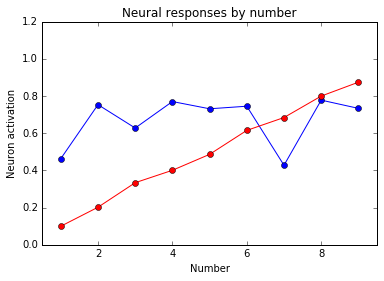

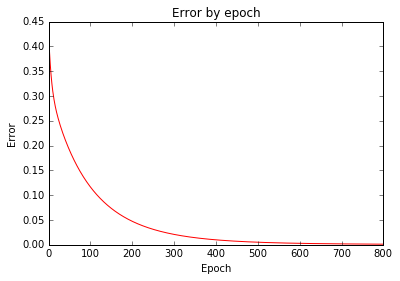

In [87]:
E = []  # Error by epoch

w = np.random.random(num.size)/10   # Synapses

ys_start = [calculate_response(j) for j in vals]

plt.axis([0.5, 9.5, 0, 1.2])
plt.plot(vals, ys_start, "bo-")

gradient_descent(n = 800)

ys_end = [calculate_response(j) for j in vals]
plt.plot(vals, ys_end, "ro-")
plt.title("Neural responses by number")
plt.xlabel("Number")
plt.ylabel("Neuron activation")
plt.show()

plt.plot(E, "r-")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error by epoch")
plt.show()

### Multiple response unit solution

Another solution, a bit more complicated, requires modifying the network so that our 28 input units are mapped to 9 output units, one for each number 1..9. In turn, this requires defining the synaptic layer as a 28x9 matrix between 28 input units and 9 response units. 

In [125]:
w = np.random.random((num.size, 9)) / 10   # Synapses

A few functions need to be redefined to adapt to this new format. 

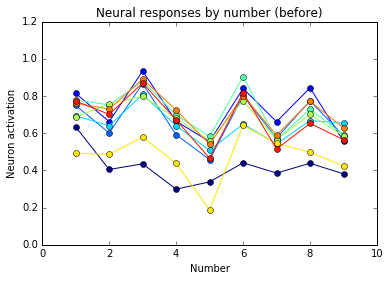

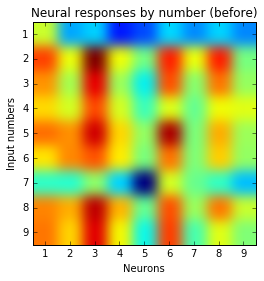

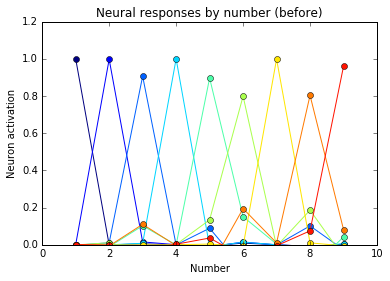

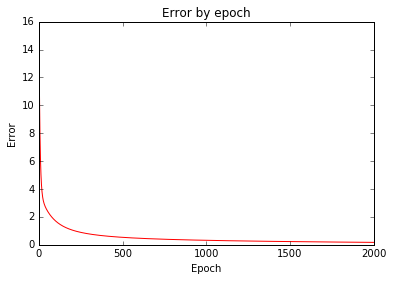

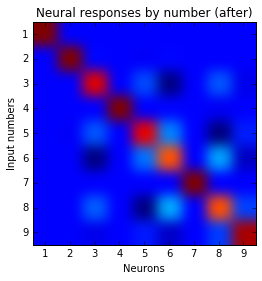

In [126]:
def activation():
    """Linear activation rule"""
    z = x.reshape((1, 28))
    inputs = z.dot(w)
    return inputs

def calculate_response(digit):
    """Calculates the response of the neuron to a digit"""
    set_inputs(digit)
    return activation()


def target(i):
    """Desired response function, t(p)"""
    z = np.zeros((9))
    z[i-1] = 1
    return z
    
def error(i, response):
    """Calculates the error function"""
    return 0.5 * np.sum(((target(i) - response) ** 2))

jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin = 0, vmax = len(vals))
scalarMap = cmx.ScalarMappable(norm = cNorm, cmap = jet)

E = []  # Error by epoch

for j in vals:
    ys = calculate_response(j)
    plt.plot(vals, ys.reshape(9).tolist(), "o-", color=scalarMap.to_rgba(j-1))
plt.axis([0,10,0,1.2])
plt.title("Neural responses by number (before)")
plt.xlabel("Number")
plt.ylabel("Neuron activation")
plt.show()

ys = np.zeros((9,9))
for j in vals:
    y = calculate_response(j)
    ys[j-1] = y
plt.imshow(ys, interpolation="kaiser")
plt.title("Neural responses by number (before)")
plt.xlabel("Neurons")
plt.ylabel("Input numbers")
plt.xlabel("Neurons")
plt.xticks(vals -1, vals)
plt.ylabel("Input numbers")
plt.yticks(vals -1, vals)
plt.show()



gradient_descent(n = 2000)

for j in vals:
    ys = calculate_response(j)
    plt.plot(vals, ys.reshape(9).tolist(), "o-", color=scalarMap.to_rgba(j-1))
plt.axis([0,10,0,1.2])
plt.title("Neural responses by number (before)")
plt.xlabel("Number")
plt.ylabel("Neuron activation")
plt.show()

plt.plot(E, color="red")
plt.title("Error by epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

ys = np.zeros((9,9))
for j in vals:
    y = calculate_response(j)
    ys[j-1] = y
plt.imshow(ys, interpolation="kaiser")
plt.title("Neural responses by number (after)")
plt.xlabel("Neurons")
plt.xticks(vals -1, vals)
plt.ylabel("Input numbers")
plt.yticks(vals -1, vals)
plt.show()


3.655017215853436

# More neural networks

Let's continue our work with neural networks

## The power of neural networks

The power of feedforward neural networks comes from the use of nonlinear activation functions and hidden layers. The hidden layers are the most important part; they expand the dimensionality of the inputs, making it possible to separate them into classes.

For example, let's reconsider the XOR network with backpropagation, only this time with linear functions.

### Variables for the network

In [181]:
n_input  = 2
n_hidden = 20
n_output = 1
eta = 0.5   # Learning rate. This is higher than usual.
epochs = 5000

# The patterns to learn

patterns = [[0, 0], [0, 1], [1, 0], [1, 1]]

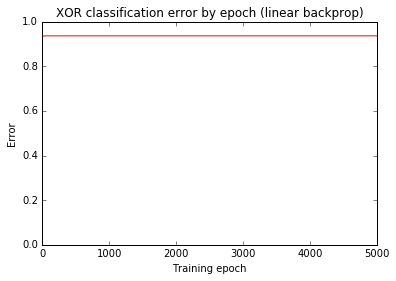

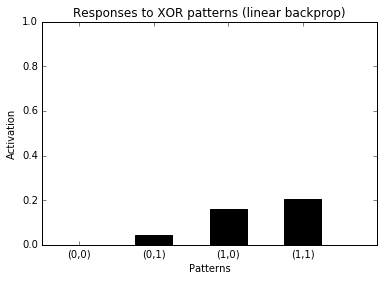

In [182]:
# A Feedforward neural network solving the XOR problem with backprop.

x  = np.zeros((1, n_input))                              # Input values
w1 = (np.random.random((n_input, n_hidden)) / 5) - 0.1    # First layer of synapses
h  = np.zeros((1, n_hidden))                              # Hidden layer
w2 = (np.random.random((n_hidden, n_output)) / 5) - 0.1   # Second layer of synapses


# Redefining some crucial functions

def calculate_response(digit):
    """Calculates the response of the neuron to a digit"""
    set_inputs(digit)
    return activation()

def linear(x, deriv = False):
    """Linear activation function (with derivative)"""
    if deriv:
        return 1.0
    else:
        return x

def logistic(x, deriv = False):
    """Sigmoid logistic function (with derivative)"""
    if deriv:
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

def set_inputs(vals):
    """Sets a given XOR pattern into the input value"""
    global x
    x = np.array(vals).reshape((1,2))
    
    
def activation():
    """Spreads activation through a network"""
    global h
    
    # First pass, from input to hidden layer
    h_input = np.dot(x, w1)
    h = linear(h_input)
    
    # Second pass, from input layer to output
    output_input = np.dot(h, w2)
    return linear(output_input)


def target(val):
    """Desired response function, t(p)"""
    if  np.all(val == np.array([0, 1])) or np.all(val == np.array([1, 0])):
        return 1.0
    else:
        return 0.0

def error(i, response):
    """Calculates the error function"""
    return 0.5 * ((target(i) - response) ** 2)

    
def backprop(n = 1):
    """Performs the backpropagation algorithm over N epochs, returns error function"""
    E = []
    global w1
    global w2
    for i in np.arange(n):
        e = 0.0

        for p in patterns:
            o = calculate_response(p)
            e += error(p, o)
            
            # Error in output layer
            o_error = target(p) - o
            do = o_error * linear(o, deriv = True)
            
            # error in hidden layer
            h_error = np.dot(do, w2.T) 
            dh = h_error * linear(h, deriv = True)
            
            # If you had other layers, we could go on and on...
            
            dw2 = np.dot(h.T, do) 
            dw1 = np.dot(x.T, dh)
            
            w2 += eta * dw2
            w1 += eta * dw1
        
        E.append(np.asscalar(e))  # Error at epoch i 
    return E  # Returns the list of error by epoch
            

# Plot the error function by epoch
plt.plot(backprop(epochs), "r-")
plt.xlabel("Training epoch")
plt.ylabel("Error")
plt.axis([0, epochs, 0, 1])
plt.title("XOR classification error by epoch (linear backprop)")
plt.show()

# Plot the responses to the XOR patterns
y_end = [calculate_response(p) for p in patterns]
fig, ax = plt.subplots()
ax.axis([-0.5, 3.5, 0, 1])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["(%s,%s)" % tuple(p) for p in patterns])
ax.set_ylabel("Activation")
ax.set_xlabel("Patterns")
ax.bar(np.arange(4) - 0.25, y_end, 0.5, color='black')
ax.set_title("Responses to XOR patterns (linear backprop)")
plt.show()

In [ ]:
# Autoassociator

n_x1 = 10
n_x2 = 10

x1 = np.zeros((1, n_x1))
x2 = np.zeros((1, n_x2))
w = np.random.random((n_x1, n_x2))

 

## Classic conditioning with Hebb rule

This is a model of the classic experiment whereby the eyeblink response a rabbit, normally elicited by _unconditioned stimulus_ of an air puff,  becomes a _conditioned response_ to a the _conditioned stimulus_ of a tone. 

First, the network setup

In [469]:
tone = 1
swab = 1
blink = 1

no_tone = 0
no_swab = 0
no_blink = 0

x_tone = 0
x_swab = 0
y_blink = 0

w_tb = 0
w_pb = 1

eta = 0.025
gamma = 4

p_conditioning = [tone, swab] 
p_test = [tone, no_swab] 


Then, the simulations:

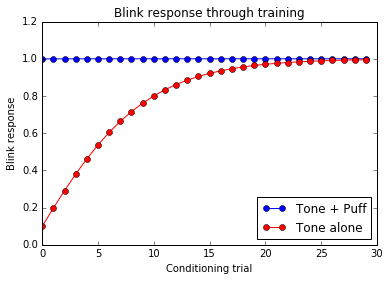

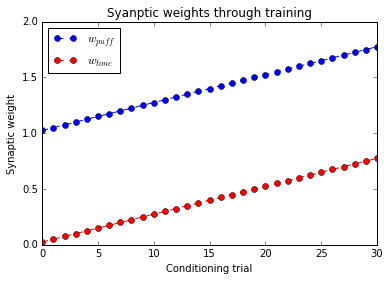

In [470]:
# Conditioning network


def set_inputs(p):
    """Sets the input"""
    global x_tone
    global x_swab
    
    x_tone = p[0]
    x_swab = p[1]

def activation():
    """Calculates activation"""
    global y_blink
    y_blink = np.tanh(gamma * (w_tb * x_tone + w_pb * x_swab))
    
def hebb():
    """Updates synaptic weights"""
    global w_pb
    global w_tb
    w_pb += eta * x_swab * y_blink
    w_tb += eta * x_tone * y_blink
    
train = []
test = []
w_pb_history = []
w_tb_history = []

def hebb_train(n = 30):
    """Conditioning paradigm"""
    for j in range(n):
        set_inputs(p_conditioning)
        activation()
        train.append(y_blink)
        
        hebb()
        
        set_inputs(p_test)
        activation()
        test.append(y_blink)
        
        w_pb_history.append(w_pb)
        w_tb_history.append(w_tb)


hebb_train()
plt.plot(train, "bo-")
plt.plot(test, "ro-")
plt.xlabel("Conditioning trial")
plt.ylabel("Blink response")
plt.title("Blink response through training")
plt.legend(["Tone + Puff", "Tone alone"], loc="best")
plt.axis([0, 30, 0, 1.2])
plt.show()


hebb_train()
plt.plot(w_pb_history, "bo--")
plt.plot(w_tb_history, "ro--")
plt.xlabel("Conditioning trial")
plt.ylabel("Synaptic weight")
plt.title("Syanptic weights through training")
plt.legend([r"$w_{puff}$", r"$w_{tone}$"], loc="best")
plt.axis([0, 30, 0, 2.0])
plt.show()


### Oja's rule

Oja's rule essentially adapts the weight matrix to extract the principal component of a number of vectors.

Here are the parameters

In [579]:
nx = 10
x = np.zeros((1, nx))
w = np.random.random(x.shape)/100
y = 0.0
eta = 0.05


And here a demonstration

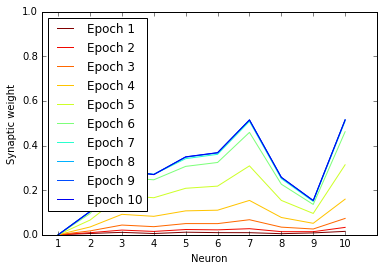

In [580]:

def generate_patterns(n=6):
    """Generates binary patterns"""
    patterns = []
    scale = np.array(np.arange(0.5, 2.0, 1.5/nx))
    scale = scale.reshape((1, nx))
    for i in range(n):
        p = np.random.random(x.shape)
        p *= scale
        p = np.round(p)
        patterns.append(p)
    return patterns

def set_inputs(p):
    global x
    x = np.array(p).reshape((1, nx))

def calculate_response(p):
    global y
    set_inputs(p)
    y = activation()
    return y

def activation():
    return linear(x.dot(w.T))

w_history = []

def oja(epochs=200):
    """Oja's rule"""
    global w, y
    for i in np.arange(epochs):
        for p in patterns:
            y = calculate_response(p)
            dw = eta * y * (x - w * y)
            w = w + dw
        w_history.append(w)


jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin = 0, vmax = 10)
scalarMap = cmx.ScalarMappable(norm = cNorm, cmap = jet)

patterns = generate_patterns()
oja(10)
#print w_history
for i in range(10):
    plt.plot(w_history[i].tolist()[0], color = scalarMap.to_rgba(10-i))
plt.ylabel("Synaptic weight")
plt.xlabel("Neuron")
plt.axis([-0.5, nx - 1/2, 0, 1])
plt.xticks(range(nx), ["%s" % (x+1) for x in range(nx)])
plt.legend(["Epoch %s" % (x+1) for x in range(10)], loc="best")
plt.show()

In [ ]:
# Contrastive hebbian learning

n_x  = 2
n_h = 5
n_o = 1
o_clamped = False

x = np.zeros((1, n_x))
h = np.zeros((1, n_h))
o = np.zeros((1, n_o))

w_ih = np.array((n_x, n_h))
w_ho = np.array((n_h, n_o))
w_hi = np.array((n_i, n_h))
w_ho = np.array((n_h, n_o))

def network_settle():
    """Settles the network"""
    E = 100.0
    while E > 0.001:
        